In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

## Read & Preprocess Data

In [2]:
match_df = pd.read_csv("match_data.csv")
# To ensure time order
match_df = match_df.sort_values(['fixture_id', 'halftime', 'minute', 'second'])
match_df.head()

,fixture_id,halftime,current_time,half_start_datetime,match_start_datetime,minute,second,latest_bookmaker_update,suspended,stopped,...,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home,current_state,final_score,result
952,19134453.0,1st-half,2024-08-16 19:01:19,2024-08-16 19:00:31,2024-08-16 19:00:31,0,48,2024-08-16 19:01:17,False,False,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,X,1-0,1
953,19134453.0,1st-half,2024-08-16 19:02:18,2024-08-16 19:00:31,2024-08-16 19:00:31,1,47,2024-08-16 19:02:16,False,False,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,X,1-0,1
954,19134453.0,1st-half,2024-08-16 19:03:19,2024-08-16 19:00:31,2024-08-16 19:00:31,2,48,2024-08-16 19:03:15,False,False,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,X,1-0,1
955,19134453.0,1st-half,2024-08-16 19:04:18,2024-08-16 19:00:31,2024-08-16 19:00:31,3,47,2024-08-16 19:04:08,False,False,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,X,1-0,1
956,19134453.0,1st-half,2024-08-16 19:05:19,2024-08-16 19:00:31,2024-08-16 19:00:31,4,48,2024-08-16 19:05:15,False,False,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,X,1-0,1


In [3]:
match_df.describe()

,fixture_id,minute,second,1,2,X,Accurate Crosses - away,Accurate Crosses - home,Assists - away,Assists - home,...,Tackles - away,Tackles - home,Throwins - away,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home
count,6.394400e+04,63944.000000,63944.000000,63944.000000,63944.000000,63944.000000,60916.000000,60937.000000,36010.000000,36013.000000,...,61984.000000,61995.000000,62811.000000,62818.000000,61729.000000,61740.000000,63864.000000,63875.000000,40700.000000,40707.000000
mean,1.914800e+07,25.476526,27.695421,18.510137,29.482377,8.698023,2.010276,2.631209,0.812746,0.901397,...,8.411122,8.613533,8.751254,9.090722,7.766755,9.851749,0.911640,0.802630,0.011794,0.005503
std,1.345825e+04,14.496434,18.289720,64.166275,82.639170,12.092077,1.950212,2.292960,0.794087,0.826550,...,5.695672,5.720836,5.957945,6.351125,6.054359,7.351268,1.166182,1.069864,0.117546,0.073977
min,1.913445e+07,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.913530e+07,13.000000,10.000000,1.330000,1.950000,3.000000,0.000000,1.000000,0.000000,0.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,1.913974e+07,25.000000,27.000000,2.500000,4.000000,3.750000,2.000000,2.000000,1.000000,1.000000,...,8.000000,8.000000,8.000000,8.000000,7.000000,9.000000,1.000000,0.000000,0.000000,0.000000
75%,1.915513e+07,38.000000,44.000000,5.500000,13.000000,7.500000,3.000000,4.000000,1.000000,1.000000,...,12.000000,13.000000,13.000000,13.000000,11.000000,14.000000,1.000000,1.000000,0.000000,0.000000
max,1.917212e+07,80.000000,59.000000,501.000000,501.000000,51.000000,12.000000,14.000000,5.000000,6.000000,...,33.000000,33.000000,34.000000,45.000000,45.000000,46.000000,9.000000,7.000000,2.000000,1.000000


To analyze why some features contain high # of null values:

In [4]:
match_df.isna().sum(axis=0).sort_values(ascending=False).head(10)

Free Kicks - home         58465
Free Kicks - away         58465
Injuries - away           46318
Injuries - home           46316
Counter Attacks - away    41211
Counter Attacks - home    41209
Assists - away            27934
Assists - home            27931
Goal Attempts - away      27536
Goal Attempts - home      27529
dtype: int64

In [5]:
match_df[match_df['fixture_id']==19172115.0][['Free Kicks - home', 'Free Kicks - away', 'Injuries - away']]

,Free Kicks - home,Free Kicks - away,Injuries - away
58514,NaN,NaN,NaN
58515,NaN,NaN,NaN
58516,NaN,NaN,NaN
58517,NaN,NaN,NaN
58518,NaN,NaN,NaN
...,...,...,...
58608,NaN,NaN,1.0
58609,NaN,NaN,1.0
58610,NaN,NaN,1.0
58611,NaN,NaN,1.0


In [6]:
match_df[match_df['fixture_id']==19172115.0][['Free Kicks - home', 'Free Kicks - away', 'Injuries - away']].dropna(how='all')

,Free Kicks - home,Free Kicks - away,Injuries - away
58590,NaN,NaN,1.0
58591,NaN,NaN,1.0
58592,NaN,NaN,1.0
58593,NaN,NaN,1.0
58594,NaN,NaN,1.0
58595,NaN,NaN,1.0
58596,NaN,NaN,1.0
58597,NaN,NaN,1.0
58598,NaN,NaN,1.0
58599,NaN,NaN,1.0


It seems like injuries started to take value 1 after being null and continued that way. Therefore, I think these null values are initial values and can be filled with 0 since they all start as 0 at the start of the game until there is a change, which we expect to be recorded in the data.

In [7]:
# Forward fill with time order
match_val_cols = match_df.columns[7:]
# Since the data already sorted
match_filled_df = match_df.groupby(['fixture_id'])[match_val_cols].ffill()
match_filled_df = match_filled_df.sort_index()

# Fill remaining (initial) values with 0
match_filled_df = match_filled_df.fillna(0)

match_df.loc[:, match_val_cols] = match_filled_df

In [8]:
usable_odd_mask = (match_df['suspended'].astype(int) + match_df['stopped'].astype(int)) == 0
match_odd_df = match_df[usable_odd_mask].copy()

## Task 1

In [9]:
# Q1
match_odd_df['P(1)_v1'] = 1/match_odd_df['1']
match_odd_df['P(X)_v1'] = 1/match_odd_df['X']
match_odd_df['P(2)_v1'] = 1/match_odd_df['2']

In [10]:
# Q2
match_total_prob = 1/match_odd_df['1'] + 1/match_odd_df['X'] + 1/match_odd_df['2']
match_odd_df['P(1)_norm'] = (1/match_odd_df['1']) * (1/match_total_prob)
match_odd_df['P(X)_norm'] = 1/match_odd_df['X'] * (1/match_total_prob)
match_odd_df['P(2)_norm'] = 1/match_odd_df['2'] * (1/match_total_prob)

In [11]:
first_half_mask = match_odd_df['halftime'] == '1st-half'
match_fh_df = match_odd_df[first_half_mask].copy()
match_sh_df = match_odd_df[~first_half_mask].copy()

### Q3

Text(0.5, 0, 'P(Home Win) - P(Home Lose), V1')

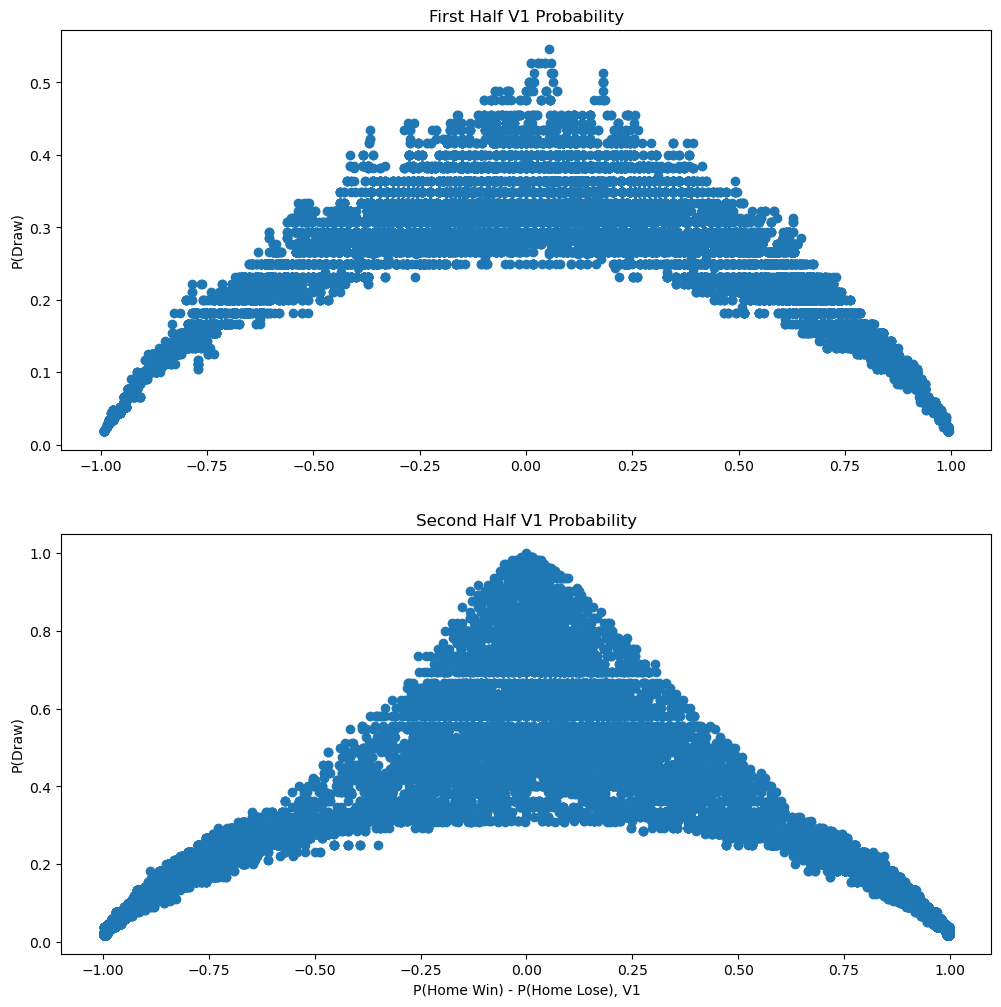

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
ax[0].scatter(x=(match_fh_df['P(1)_v1'] - match_fh_df['P(2)_v1']),
              y=match_fh_df['P(X)_v1'])
ax[1].scatter(x=(match_sh_df['P(1)_v1'] - match_sh_df['P(2)_v1']),
              y=match_sh_df['P(X)_v1'])

ax[0].set_title('First Half V1 Probability')
ax[0].set_ylabel('P(Draw)')
ax[1].set_xlabel('P(Home Win) - P(Home Lose), V1')
ax[1].set_title('Second Half V1 Probability')
ax[1].set_ylabel('P(Draw)')
ax[1].set_xlabel('P(Home Win) - P(Home Lose), V1')

Text(0.5, 0, 'P(Home Win) - P(Home Lose), Normalized')

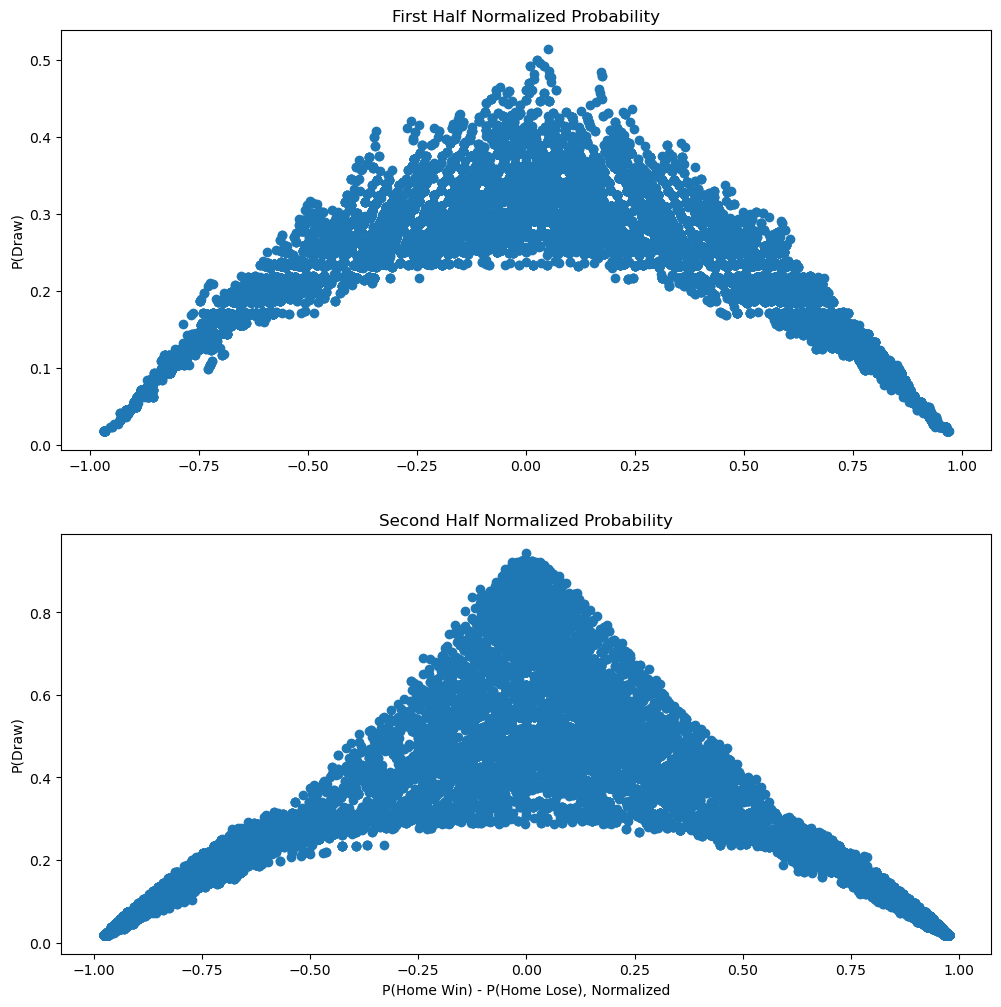

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
ax[0].scatter(x=(match_fh_df['P(1)_norm'] - match_fh_df['P(2)_norm']),
              y=match_fh_df['P(X)_norm'])
ax[1].scatter(x=(match_sh_df['P(1)_norm'] - match_sh_df['P(2)_norm']),
              y=match_sh_df['P(X)_norm'])

ax[0].set_title('First Half Normalized Probability')
ax[0].set_ylabel('P(Draw)')
ax[1].set_xlabel('P(Home Win) - P(Home Lose), Normalized')
ax[1].set_title('Second Half Normalized Probability')
ax[1].set_ylabel('P(Draw)')
ax[1].set_xlabel('P(Home Win) - P(Home Lose), Normalized')

### Q4

In [14]:
task1_q4_bins = np.linspace(-1, 1, 21)
match_fh_df['P(1) - P(2)'] = (match_fh_df['P(1)_norm'] - match_fh_df['P(2)_norm'])
match_fh_df['is_draw'] = (match_fh_df['result'] == 'X').astype(int)
match_sh_df['P(1) - P(2)'] = (match_sh_df['P(1)_norm'] - match_sh_df['P(2)_norm'])
match_sh_df['is_draw'] = (match_sh_df['result'] == 'X').astype(int)

In [15]:
match_fh_df['Home-Away Bin'] = np.digitize(match_fh_df['P(1) - P(2)'], task1_q4_bins, right=True)
match_sh_df['Home-Away Bin'] = np.digitize(match_sh_df['P(1) - P(2)'], task1_q4_bins, right=True)

Text(0.5, 0, 'P(Home Win) - P(Home Lose), Normalized')

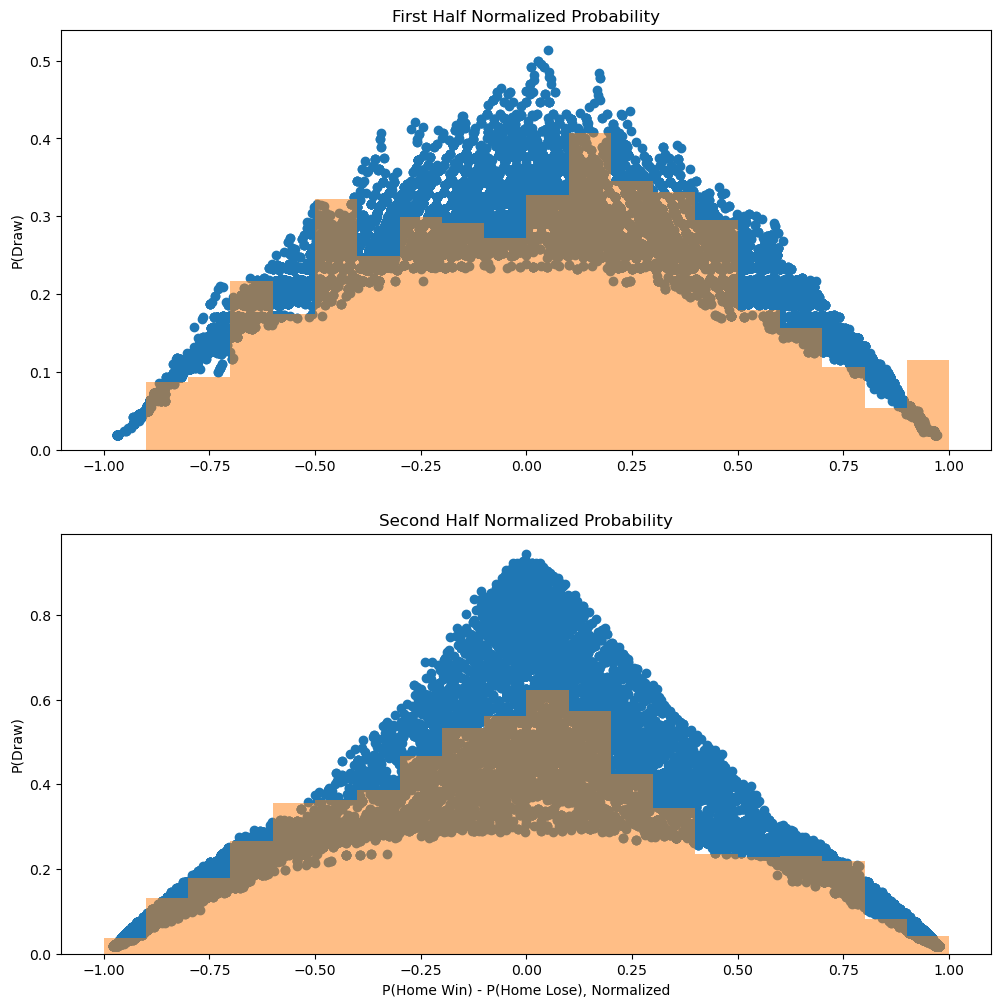

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
ax[0].scatter(x=(match_fh_df['P(1)_norm'] - match_fh_df['P(2)_norm']),
              y=match_fh_df['P(X)_norm'])
ax[0].bar(task1_q4_bins[:-1], match_fh_df.groupby('Home-Away Bin')['is_draw'].mean().values, align='edge', alpha=0.5, width=0.1)

ax[1].scatter(x=(match_sh_df['P(1)_norm'] - match_sh_df['P(2)_norm']),
              y=match_sh_df['P(X)_norm'])
ax[1].bar(task1_q4_bins[:-1], match_sh_df.groupby('Home-Away Bin')['is_draw'].mean().values, align='edge', alpha=0.5, width=0.1)

ax[0].set_title('First Half Normalized Probability')
ax[0].set_ylabel('P(Draw)')
ax[1].set_xlabel('P(Home Win) - P(Home Lose), Normalized')
ax[1].set_title('Second Half Normalized Probability')
ax[1].set_ylabel('P(Draw)')
ax[1].set_xlabel('P(Home Win) - P(Home Lose), Normalized')

Points below orange histogram can be considered as underestimated points by the bookmaker and one may can expect to win in the long term by betting draw for such points. 

## Task 2

In [17]:
cleaned_match_df = match_odd_df.copy()

In [18]:
long_match_df = match_odd_df[~first_half_mask & (match_odd_df['minute'] > 45)]
end_change_df = long_match_df.groupby('fixture_id').agg(n_state_changes=('current_state', 'nunique'))

In [19]:
end_change_df.sort_values('n_state_changes')

,n_state_changes
fixture_id,
19134453.0,1
19155085.0,1
19155084.0,1
19155083.0,1
19155081.0,1
...,...
19172073.0,2
19154555.0,2
19172078.0,2


In [20]:
end_change_fix_id = end_change_df[end_change_df['n_state_changes']==2].index
print(len(end_change_fix_id))
cleaned_match_df = cleaned_match_df[~cleaned_match_df['fixture_id'].isin(end_change_fix_id)]

41


In [21]:
red_card_cols = cleaned_match_df.columns[cleaned_match_df.columns.str.startswith('Red')]
clean_fh_mask = cleaned_match_df['halftime'] == '1st-half'
red_card_mask = cleaned_match_df[red_card_cols].sum(axis=1) > 0

start_rc_mask = clean_fh_mask & (cleaned_match_df['minute'] <= 22.5) & red_card_mask
print(cleaned_match_df[start_rc_mask]['fixture_id'].nunique())
cleaned_match_df = cleaned_match_df[~start_rc_mask]

6


In [22]:
# Q1
cleaned_match_df['P(1)_v1'] = 1/cleaned_match_df['1']
cleaned_match_df['P(X)_v1'] = 1/cleaned_match_df['X']
cleaned_match_df['P(2)_v1'] = 1/cleaned_match_df['2']

In [23]:
# Q2
cl_match_ttl_prob = 1/cleaned_match_df['1'] + 1/cleaned_match_df['X'] + 1/cleaned_match_df['2']
cleaned_match_df['P(1)_norm'] = (1/cleaned_match_df['1']) * (1/cl_match_ttl_prob)
cleaned_match_df['P(X)_norm'] = 1/cleaned_match_df['X'] * (1/cl_match_ttl_prob)
cleaned_match_df['P(2)_norm'] = 1/cleaned_match_df['2'] * (1/cl_match_ttl_prob)

In [24]:
cl_fh_mask = cleaned_match_df['halftime'] == '1st-half'
cl_match_fh_df = cleaned_match_df[cl_fh_mask].copy()
cl_match_sh_df = cleaned_match_df[~cl_fh_mask].copy()

### Q3

Text(0.5, 0, 'P(Home Win) - P(Home Lose), V1')

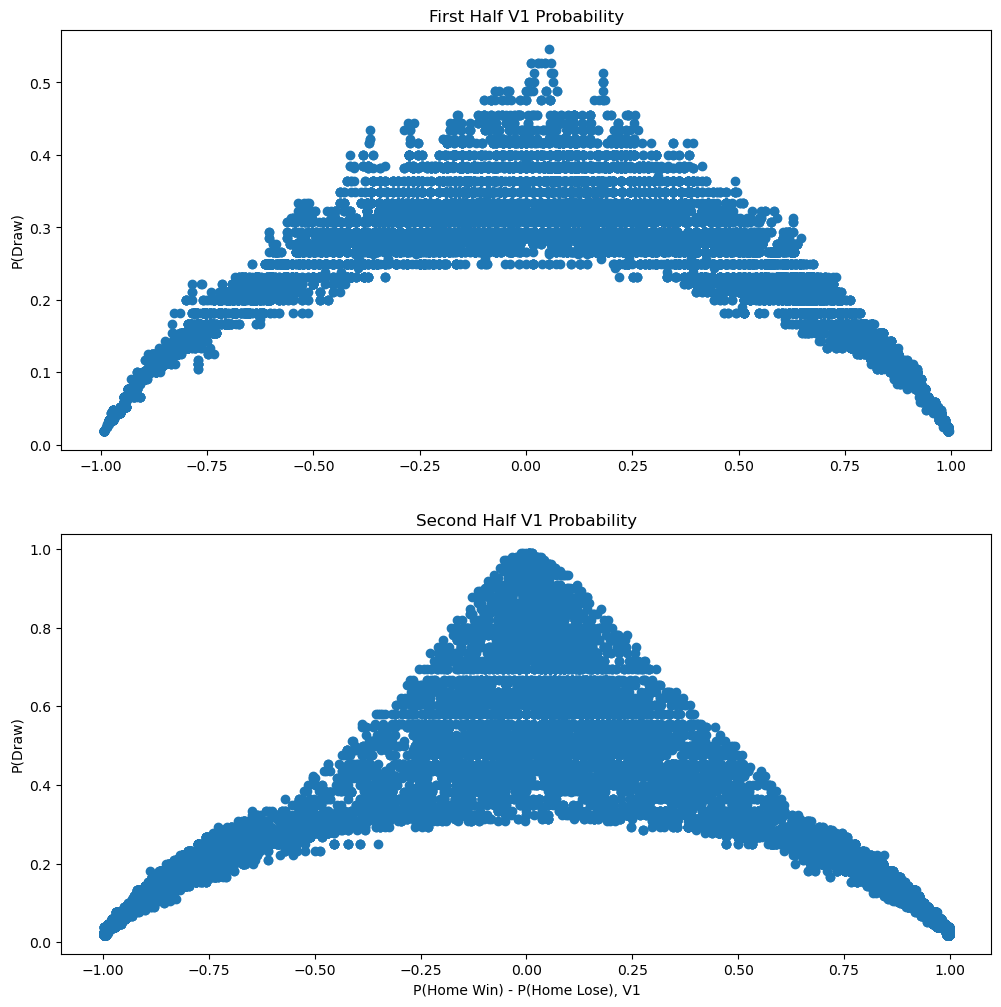

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
ax[0].scatter(x=(cl_match_fh_df['P(1)_v1'] - cl_match_fh_df['P(2)_v1']),
              y=cl_match_fh_df['P(X)_v1'])
ax[1].scatter(x=(cl_match_sh_df['P(1)_v1'] - cl_match_sh_df['P(2)_v1']),
              y=cl_match_sh_df['P(X)_v1'])

ax[0].set_title('First Half V1 Probability')
ax[0].set_ylabel('P(Draw)')
ax[1].set_xlabel('P(Home Win) - P(Home Lose), V1')
ax[1].set_title('Second Half V1 Probability')
ax[1].set_ylabel('P(Draw)')
ax[1].set_xlabel('P(Home Win) - P(Home Lose), V1')

Text(0.5, 0, 'P(Home Win) - P(Home Lose), Normalized')

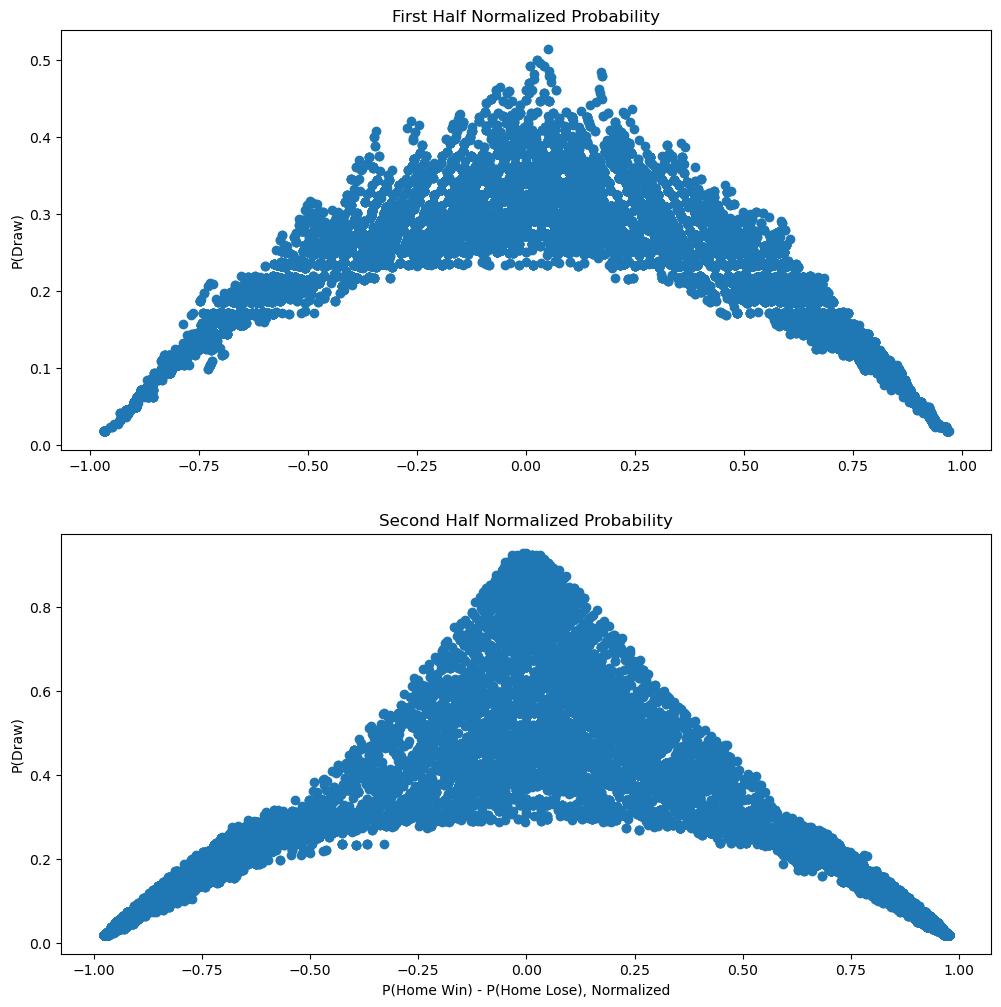

In [26]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
ax[0].scatter(x=(cl_match_fh_df['P(1)_norm'] - cl_match_fh_df['P(2)_norm']),
              y=cl_match_fh_df['P(X)_norm'])
ax[1].scatter(x=(cl_match_sh_df['P(1)_norm'] - cl_match_sh_df['P(2)_norm']),
              y=cl_match_sh_df['P(X)_norm'])

ax[0].set_title('First Half Normalized Probability')
ax[0].set_ylabel('P(Draw)')
ax[1].set_xlabel('P(Home Win) - P(Home Lose), Normalized')
ax[1].set_title('Second Half Normalized Probability')
ax[1].set_ylabel('P(Draw)')
ax[1].set_xlabel('P(Home Win) - P(Home Lose), Normalized')

### Q4

In [27]:
cl_match_fh_df['P(1) - P(2)'] = (cl_match_fh_df['P(1)_norm'] - cl_match_fh_df['P(2)_norm'])
cl_match_fh_df['is_draw'] = (cl_match_fh_df['result'] == 'X').astype(int)
cl_match_sh_df['P(1) - P(2)'] = (cl_match_sh_df['P(1)_norm'] - cl_match_sh_df['P(2)_norm'])
cl_match_sh_df['is_draw'] = (cl_match_sh_df['result'] == 'X').astype(int)

In [28]:
cl_match_fh_df['Home-Away Bin'] = np.digitize(cl_match_fh_df['P(1) - P(2)'], task1_q4_bins, right=True)
cl_match_sh_df['Home-Away Bin'] = np.digitize(cl_match_sh_df['P(1) - P(2)'], task1_q4_bins, right=True)

Text(0.5, 0, 'P(Home Win) - P(Home Lose), Normalized')

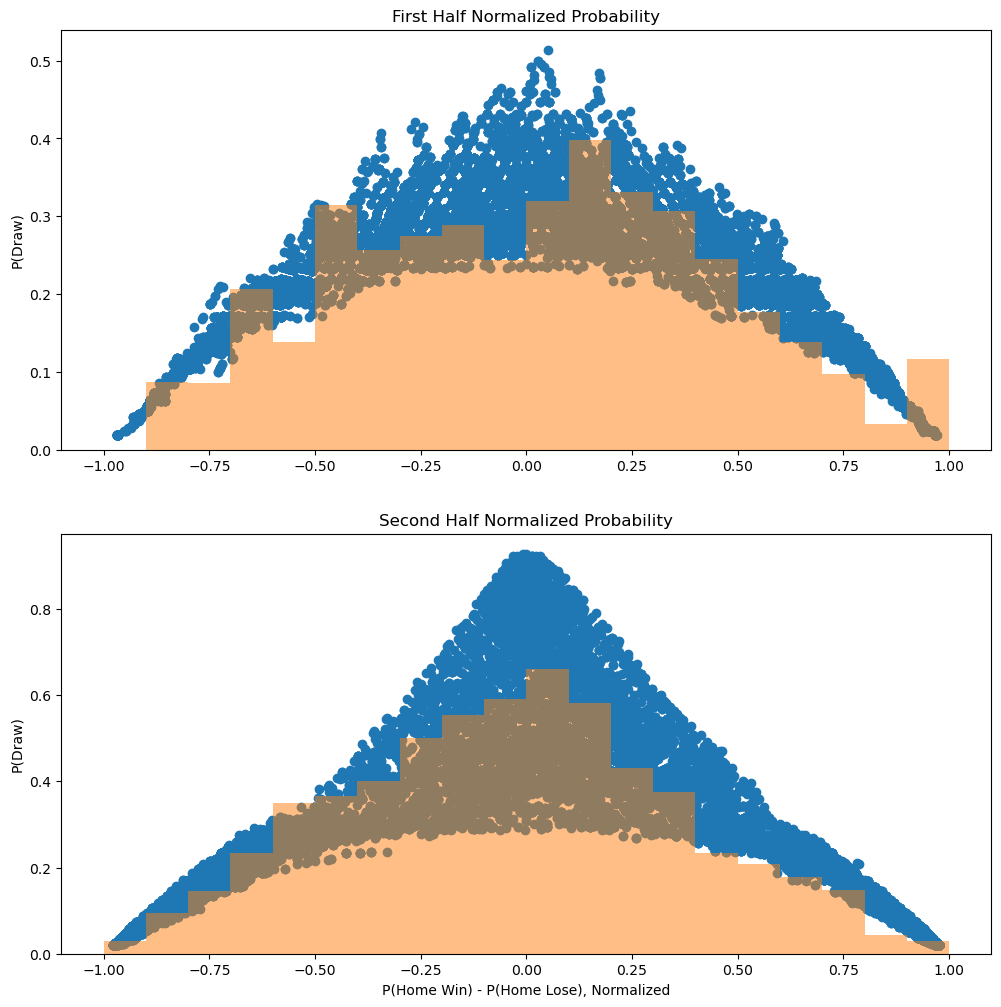

In [29]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
ax[0].scatter(x=(cl_match_fh_df['P(1)_norm'] - cl_match_fh_df['P(2)_norm']),
              y=cl_match_fh_df['P(X)_norm'])
ax[0].bar(task1_q4_bins[:-1], cl_match_fh_df.groupby('Home-Away Bin')['is_draw'].mean().values, align='edge', alpha=0.5, width=0.1)

ax[1].scatter(x=(cl_match_sh_df['P(1)_norm'] - cl_match_sh_df['P(2)_norm']),
              y=cl_match_sh_df['P(X)_norm'])
ax[1].bar(task1_q4_bins[:-1], cl_match_sh_df.groupby('Home-Away Bin')['is_draw'].mean().values, align='edge', alpha=0.5, width=0.1)

ax[0].set_title('First Half Normalized Probability')
ax[0].set_ylabel('P(Draw)')
ax[1].set_xlabel('P(Home Win) - P(Home Lose), Normalized')
ax[1].set_title('Second Half Normalized Probability')
ax[1].set_ylabel('P(Draw)')
ax[1].set_xlabel('P(Home Win) - P(Home Lose), Normalized')

Same comment with Task 1 can be said here as well, however there seems like lower # of such points which is expected since these situations are harder to predict for the bookmaker.

## Task 3

In [30]:
match_pred_df = cleaned_match_df.copy()
randgen = np.random.RandomState(0)

In [31]:
# Since halftime & minute has lower cardinality than other continuous features,
# especially halftime since it probably will not be considered by DTs otherwise
match_pred_df.loc[:, 'minute'] = match_pred_df['minute'] + np.where(match_pred_df['halftime'] == '2nd-half', 45, 0)

In [32]:
# Odd & percentage features are normalized already
continuous_feature_arr = match_df.columns[match_df.dtypes == 'float64'][4:]
percent_feature_arr = continuous_feature_arr[continuous_feature_arr.str.lower().str.contains('percentage|%')]
continuous_feature_arr = continuous_feature_arr[~continuous_feature_arr.isin(percent_feature_arr)]
percent_feature_arr

Index(['Ball Possession % - away', 'Ball Possession % - home',
       'Successful Passes Percentage - away',
       'Successful Passes Percentage - home'],
      dtype='object')

In [33]:
(~continuous_feature_arr.str.contains('away|home')).sum()

0

In [34]:
unique_cont_feature_arr = continuous_feature_arr.str[:-7].unique()
unique_cont_feature_arr

Index(['Accurate Crosses', 'Assists', 'Attacks', 'Ball Safe', 'Challenges',
       'Corners', 'Counter Attacks', 'Dangerous Attacks', 'Dribble Attempts',
       'Fouls', 'Free Kicks', 'Goal Attempts', 'Goal Kicks', 'Goals',
       'Headers', 'Hit Woodwork', 'Injuries', 'Interceptions', 'Key Passes',
       'Long Passes', 'Offsides', 'Passes', 'Penalties', 'Redcards', 'Saves',
       'Score Change', 'Shots Blocked', 'Shots Insidebox', 'Shots Off Target',
       'Shots On Target', 'Shots Outsidebox', 'Shots Total', 'Substitutions',
       'Successful Dribbles', 'Successful Headers', 'Successful Interceptions',
       'Successful Passes', 'Tackles', 'Throwins', 'Total Crosses',
       'Yellowcards', 'Yellowred Cards'],
      dtype='object')

In [35]:
print('All continuous(wo percentage):', len(continuous_feature_arr), ' Unique:', len(unique_cont_feature_arr))

All continuous(wo percentage): 84  Unique: 42


Since these features are cumulative, I will transfrom them to percentage to lower time dependence of the data to be learned better by DTs

In [36]:
match_pred_df.columns[~match_pred_df.columns.isin(continuous_feature_arr)]

Index(['fixture_id', 'halftime', 'current_time', 'half_start_datetime',
       'match_start_datetime', 'minute', 'second', 'latest_bookmaker_update',
       'suspended', 'stopped', '1', '2', 'X', 'name', 'ticking',
       'Ball Possession % - away', 'Ball Possession % - home',
       'Successful Passes Percentage - away',
       'Successful Passes Percentage - home', 'current_state', 'final_score',
       'result', 'P(1)_v1', 'P(X)_v1', 'P(2)_v1', 'P(1)_norm', 'P(X)_norm',
       'P(2)_norm'],
      dtype='object')

Apart from normalized probabilities and minute information, others are not informative for the prediction task

In [37]:
for feature in unique_cont_feature_arr:
    resp_feature_arr = continuous_feature_arr[continuous_feature_arr.str.contains(feature)]
    resp_perc_df = match_pred_df[resp_feature_arr] / match_pred_df[resp_feature_arr].sum(axis=1).values[:, None]
    match_pred_df.loc[:, resp_feature_arr] = resp_perc_df

In [38]:
match_pred_df = match_pred_df[['fixture_id', 'minute', 'P(1)_norm', 'P(X)_norm', 'P(2)_norm'] + continuous_feature_arr.tolist() + ['result']]
match_pred_df.head()

,fixture_id,minute,P(1)_norm,P(X)_norm,P(2)_norm,Accurate Crosses - away,Accurate Crosses - home,Assists - away,Assists - home,Attacks - away,...,Tackles - home,Throwins - away,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home,result
952,19134453.0,0,0.572410,0.237550,0.190040,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
953,19134453.0,1,0.572410,0.237550,0.190040,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
954,19134453.0,2,0.589891,0.237431,0.172677,NaN,NaN,NaN,NaN,0.714286,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
955,19134453.0,3,0.579878,0.233401,0.186721,NaN,NaN,NaN,NaN,0.545455,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
956,19134453.0,4,0.579878,0.233401,0.186721,NaN,NaN,NaN,NaN,0.666667,...,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [39]:
match_pred_df['fixture_id'].nunique()

607

In [40]:
test_fix_id_arr = randgen.choice(match_pred_df['fixture_id'].unique(), 120)
test_match_mask = match_pred_df['fixture_id'].isin(test_fix_id_arr)
test_match_df = match_pred_df[test_match_mask]
match_pred_df = match_pred_df[~test_match_mask]

In [41]:
match_pred_df['result'].value_counts()

result
1    19037
2    12986
X    10703
Name: count, dtype: int64

In [42]:
res_woodd_dt = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=128, class_weight='balanced', random_state=0)

In [43]:
drop_cols_wodd = ['fixture_id', 'result', 'P(1)_norm', 'P(X)_norm', 'P(2)_norm']
res_woodd_dt.fit(match_pred_df.drop(drop_cols_wodd, axis=1), match_pred_df['result'])

DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_samples_leaf=128, random_state=0)

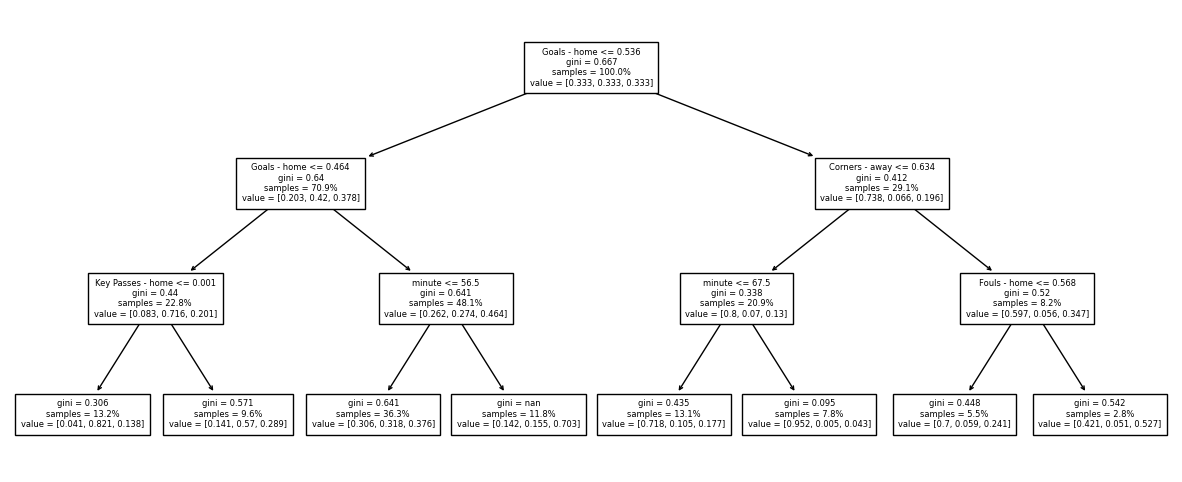

In [44]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_tree(res_woodd_dt, proportion=True, ax=ax, fontsize=6, feature_names=match_pred_df.drop(drop_cols_wodd, axis=1).columns)
plt.show()

There are some highly pure nodes (such as first and sixth terminal nodes) and some impure nodes which may get purer with further splitting.

In [45]:
test_pred_arr = res_woodd_dt.predict(test_match_df.drop(drop_cols_wodd, axis=1))

In [46]:
(test_pred_arr == test_match_df['result']).sum() / len(test_match_df)

0.6203411244472521

In [47]:
woodd_dt_df = test_match_df[['minute'] + drop_cols_wodd].copy()
woodd_dt_df[['Pred_1', 'Pred_X', 'Pred_2']] = res_woodd_dt.predict_proba(test_match_df.drop(drop_cols_wodd, axis=1))
woodd_dt_df.shape

(9498, 9)

In [48]:
resX_ineff_mask = ((woodd_dt_df['Pred_X'] > woodd_dt_df['P(X)_norm']) & (woodd_dt_df['result']=='X'))
woodd_dt_df = woodd_dt_df[resX_ineff_mask]

In [49]:
woodd_dt_df.iloc[np.argsort(woodd_dt_df['Pred_X'] - woodd_dt_df['P(X)_norm']).values[::-1]].head(20)

,minute,fixture_id,result,P(1)_norm,P(X)_norm,P(2)_norm,Pred_1,Pred_X,Pred_2
2145,91,19155070.0,X,0.004768,0.073721,0.921511,0.041295,0.820611,0.138094
2146,92,19155070.0,X,0.003822,0.073791,0.922387,0.041295,0.820611,0.138094
48863,89,19154611.0,X,0.007550,0.086479,0.905971,0.041295,0.820611,0.138094
48861,87,19154611.0,X,0.007550,0.086479,0.905971,0.041295,0.820611,0.138094
2140,86,19155070.0,X,0.007550,0.086479,0.905971,0.041295,0.820611,0.138094
2144,90,19155070.0,X,0.006308,0.086587,0.907105,0.041295,0.820611,0.138094
2143,89,19155070.0,X,0.006308,0.086587,0.907105,0.041295,0.820611,0.138094
2139,85,19155070.0,X,0.009400,0.094940,0.895660,0.041295,0.820611,0.138094
48862,88,19154611.0,X,0.009400,0.094940,0.895660,0.041295,0.820611,0.138094
2142,88,19155070.0,X,0.007549,0.095117,0.897334,0.041295,0.820611,0.138094


This is an interesting observation, all these 20 values are in same (first from left) terminal node and odds given by bookmaker is very low compared to predictions of the DT. This node represents close games in terms of goals because of the first two splits which are based on goal proportions being around .5, last split which checks Key Passes of home team checks whether home team is too passive or not since split value is very close to 0.

In [50]:
# To check how much feature transformations were helpful
clean_woprocess_df = cleaned_match_df[['fixture_id', 'minute'] + continuous_feature_arr.tolist() + ['result']]
res_woodd_woprcs_dt = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=128, class_weight='balanced', random_state=0)

In [51]:
drop_cols = ['fixture_id', 'result']
res_woodd_woprcs_dt.fit(clean_woprocess_df[~test_match_mask].drop(drop_cols, axis=1), clean_woprocess_df[~test_match_mask]['result'])

DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_samples_leaf=128, random_state=0)

In [52]:
test_pred_arr = res_woodd_woprcs_dt.predict(clean_woprocess_df[test_match_mask].drop(drop_cols, axis=1))

In [53]:
(test_pred_arr == test_match_df['result']).sum() / len(test_match_df)

0.60949673615498

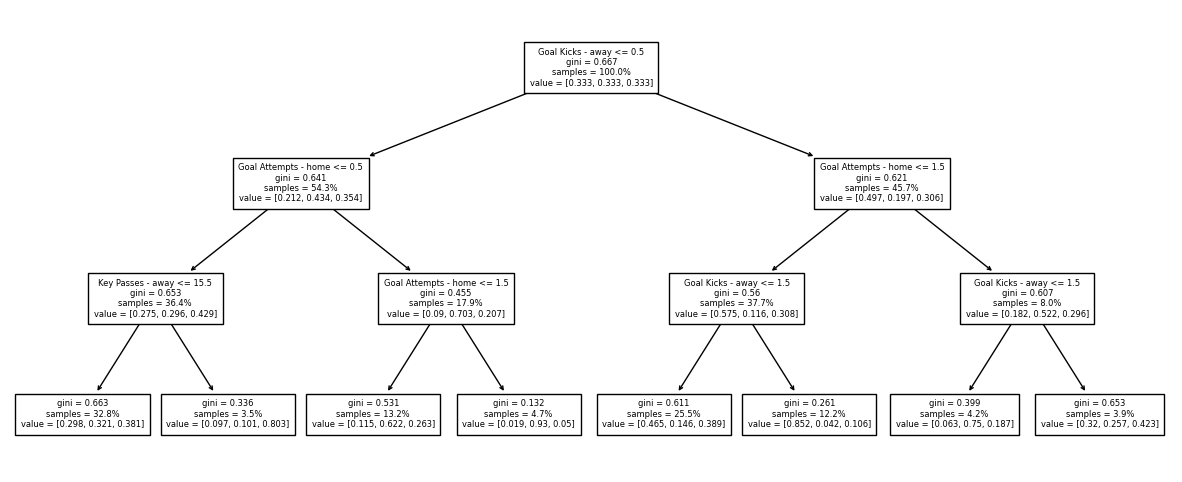

In [54]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_tree(res_woodd_woprcs_dt, proportion=True, ax=ax, fontsize=6, feature_names=match_pred_df.drop(['fixture_id', 'result'], axis=1).columns)
plt.show()

1 percent out of 61 percent is good but there is no replication so we can not say for sure that this transformation was helpful, maybe it will be more clear in ensemble DT models. However, interpretation of proportions is still easier, and we can see that minutes are not used here since features are seperated by considering their time as well.

In [55]:
# To see the effects of learning with odds provided by the bookmaker
res_wodd_dt = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=128, class_weight='balanced', random_state=0)

In [56]:
res_wodd_dt.fit(match_pred_df.drop(drop_cols, axis=1), match_pred_df['result'])

DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_samples_leaf=128, random_state=0)

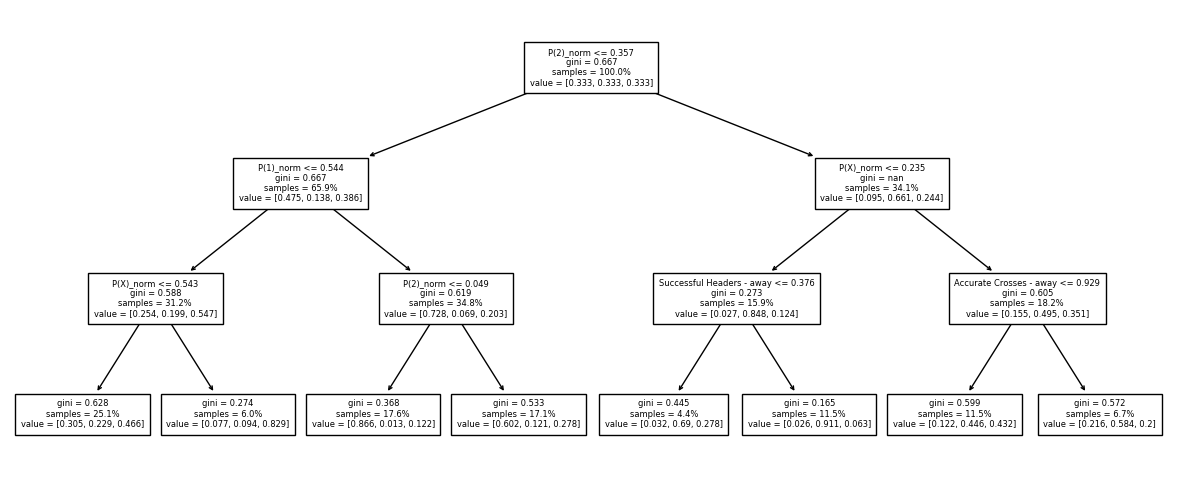

In [57]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_tree(res_wodd_dt, proportion=True, ax=ax, fontsize=6, feature_names=match_pred_df.drop(drop_cols, axis=1).columns)
plt.show()

In [58]:
test_pred_arr = res_wodd_dt.predict(test_match_df.drop(drop_cols, axis=1))

In [59]:
(test_pred_arr == test_match_df['result']).sum() / len(test_match_df)

0.6612971151821436

It seems like accuracy is higher than others in this replication, but it can not be said for sure. Almost all splits here are based on provided odds which conflicts with our goal to catch inefficients in the market.